In [1]:
# Declaração de bibliotecas específicas
import cv2
import matplotlib.pyplot as pyplot
import numpy as np

## plota os gráficos em novas janelas
#%matplotlib qt

## plota os gráficos dentro da célula
%matplotlib inline

In [2]:
#Define some constants
CLAHE_CLIP_LIMIT = 3.0
CLAHE_TILE_GRID_SIZE = (8,8)
IMG_PATH = 'data/0.0.Normal/1ffa9627-8d87-11e8-9daf-6045cb817f5b..JPG'

In [3]:
def applyCLAHE(image, clipLimit=CLAHE_CLIP_LIMIT, tileGridSize=CLAHE_TILE_GRID_SIZE):

    #-----Converting image to LAB Color model----------------------------------- 
    labImage = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

    #-----Splitting the LAB image to different channels-------------------------
    lChannel,aChannel,bChannel = cv2.split(labImage)

    #-----Applying CLAHE to L-channel-------------------------------------------
    clahe = cv2.createCLAHE(clipLimit=clipLimit, tileGridSize=tileGridSize)
    claheLChannel = clahe.apply(lChannel)

    #-----Merge the CLAHE enhanced L-channel with the a and b channel-----------
    claheLABImage = cv2.merge((claheLChannel,aChannel,bChannel))

    #-----Converting image from LAB Color model to RGB model--------------------
    claheFinalImage = cv2.cvtColor(claheLABImage, cv2.COLOR_LAB2BGR)

    return claheFinalImage

def visualize(**images):
    """PLot images in one row."""
    n = len(images)
    pyplot.figure(figsize=(16, 5))
    for i, (name, image) in enumerate(images.items()):
        pyplot.subplot(1, n, i + 1)
        pyplot.xticks([])
        pyplot.yticks([])
        pyplot.title(' '.join(name.split('_')).title())
        pyplot.imshow(image)


In [4]:
img = cv2.imread(IMG_PATH)
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

imgCLAHE = applyCLAHE(img)
imgCLAHE_RGB = cv2.cvtColor(imgCLAHE, cv2.COLOR_BGR2RGB)

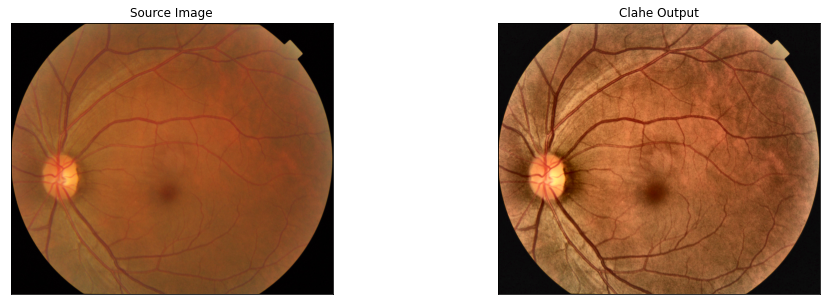

In [5]:
visualize(Source_Image = img_RGB,CLAHE_Output = imgCLAHE_RGB)

In [6]:
def redFree(image):
    #-----Split Channels--------------------------------------------------------
    bChannel, gChannel, rChannel = cv2.split(image)
    rChannel[:] = 0

    #-----Merge the Green and BLue Channel--------------------------------------
    imageBG = cv2.merge((bChannel,bChannel,rChannel))
    
    return imageBG

In [7]:
imgRedFree = redFree(img)
imgRedFreeGB = cv2.cvtColor(imgRedFree, cv2.COLOR_BGR2RGB)

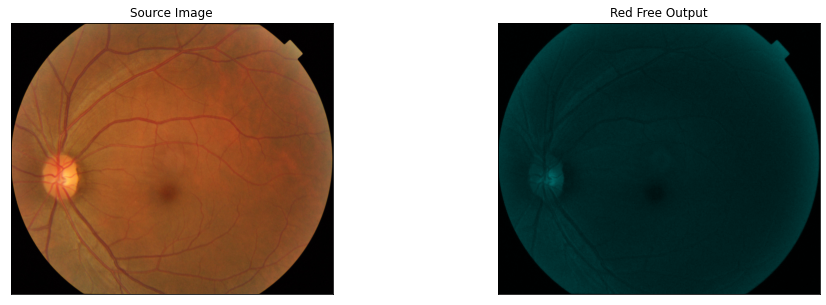

In [8]:
visualize(Source_Image = img_RGB,Red_Free_Output = imgRedFreeGB)

In [9]:
imgRedFreeCLAHE = applyCLAHE(imgRedFree)
imgRedFreeCLAHEGB = cv2.cvtColor(imgRedFreeCLAHE, cv2.COLOR_BGR2RGB)

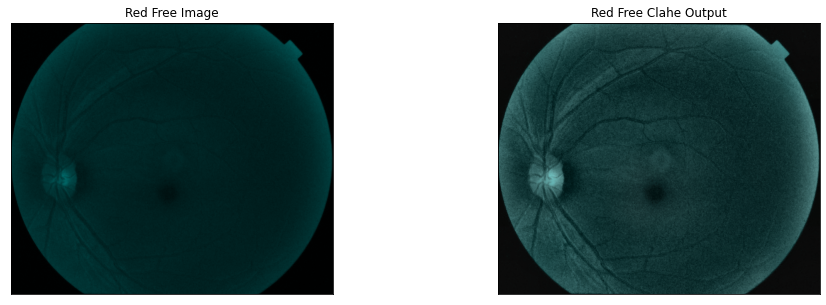

In [10]:
visualize(Red_Free_Image = imgRedFreeGB,Red_Free_CLAHE_Output = imgRedFreeCLAHEGB)

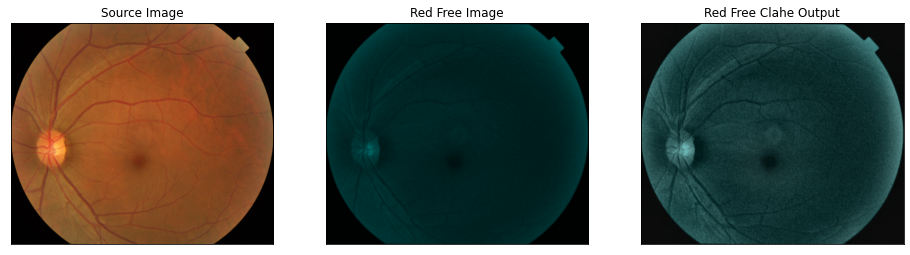

In [15]:
visualize(
    Source_Image = img_RGB,
    Red_Free_Image = imgRedFreeGB,
    Red_Free_CLAHE_Output = imgRedFreeCLAHEGB)